In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets as ds

df = ds.fetch_openml(data_id=151,as_frame=True, return_X_y=True)

In [3]:
df = (

    pd.concat(df, axis=1)

    .assign(target=lambda x: (x['class']=='UP')*1)

)

In [4]:
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,target
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP,1
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP,1
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP,1
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN,0


In [18]:
group_by_date = df.loc[:, ['date', 'nswprice', 'nswdemand']].groupby('date')
avgs = group_by_date.mean()
x = avgs.index
y1 = avgs.nswdemand
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

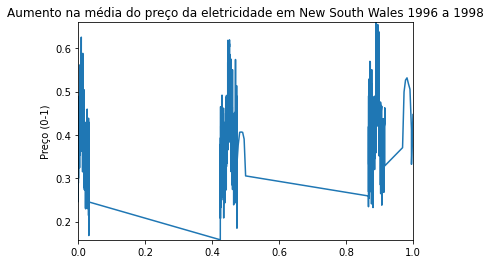

In [19]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Aumento na média do preço da eletricidade em New South Wales 1996 a 1998', 'Preço (0-1)')

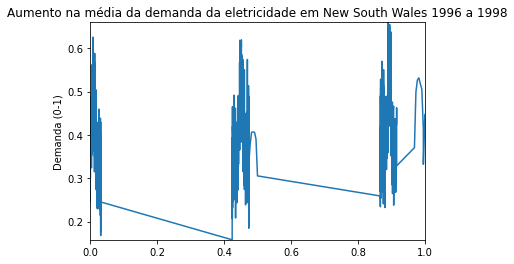

In [22]:
y2 = avgs.nswdemand
fig, ax = plt.subplots()
plot(x, y2, ax, 'Aumento na média da demanda da eletricidade em New South Wales 1996 a 1998', 'Demanda (0-1)')